# **Course 1 in IBM**





# **Reading Datas**

## **SQL databases**



1.   we import pandas for dataframe
2.   and sqlite3 for connection
3.   and to execute the query we use pds






In [ ]:
import sqlite3 as sq3
import pandas as pd
import pandas.io.sql as pds

In [ ]:
# Initialize path to SQLite database
path='classic_rock.db'
con=sq3.Connection(path)

In [ ]:
# Write the query
query = '''
SELECT * 
FROM rock_songs
'''

# Execute the query
observations = pds.read_sql(query, con)

observations.head()

,Song,Artist,Release_Year,PlayCount
0,Caught Up in You,.38 Special,1982.0,82
1,Hold On Loosely,.38 Special,1981.0,85
2,Rockin' Into the Night,.38 Special,1980.0,18
3,Art For Arts Sake,10cc,1975.0,1
4,Kryptonite,3 Doors Down,2000.0,13


In [ ]:
# We can also run any supported SQL query
# Write the query
query = '''
SELECT Artist, Release_Year, COUNT(*) AS num_songs, AVG(PlayCount) AS avg_plays  
    FROM rock_songs
    GROUP BY Artist, Release_Year
    ORDER BY num_songs desc;
'''

# Execute the query
observations = pds.read_sql(query, con)

observations.head()

,Artist,Release_Year,num_songs,avg_plays
0,The Beatles,1967.0,23,6.565217
1,Led Zeppelin,1969.0,18,21.000000
2,The Beatles,1965.0,15,3.800000
3,The Beatles,1968.0,13,13.000000
4,The Beatles,1969.0,13,15.000000


how to make use of observations.head() to show 10 not 5 as its default

In [ ]:
query = '''
SELECT Artist, Release_Year, COUNT(*) AS num_songs, AVG(PlayCount) AS avg_plays  
    FROM rock_songs
    GROUP BY Artist, Release_Year
    ORDER BY num_songs desc;
'''

# Execute the query
observations = pds.read_sql(query, con)

observations.head(10)

,Artist,Release_Year,num_songs,avg_plays
0,The Beatles,1967.0,23,6.565217
1,Led Zeppelin,1969.0,18,21.000000
2,The Beatles,1965.0,15,3.800000
3,The Beatles,1968.0,13,13.000000
4,The Beatles,1969.0,13,15.000000
5,Led Zeppelin,1970.0,12,13.166667
6,Led Zeppelin,1975.0,12,14.166667
7,Pink Floyd,1979.0,11,41.454545
8,Pink Floyd,1973.0,10,29.100000
9,The Doors,1967.0,10,28.900000


- coerce_float: Attempt to force numbers into floats
- parse_dates: List of columns to parse as dates
- chunksize: Number of rows to include in each chunk

print(f'Observations index: {index}'.format(index)) is also correct

print(f"Observations index: {index}".format(index)) is also correct

print(f"Observations index: {index}") is also correct

In [ ]:
query='''
SELECT Artist, Release_Year, COUNT(*) AS num_songs, AVG(PlayCount) AS avg_plays  
    FROM rock_songs
    GROUP BY Artist, Release_Year
    ORDER BY num_songs desc;
'''

# Execute the query
observations_generator = pds.read_sql(query,
                            con,
                            coerce_float=True, # Doesn't efefct this dataset, because floats were correctly parsed
                            parse_dates=['Release_Year'], # Parse `Release_Year` as a date
                            chunksize=5 # Allows for streaming results as a series of shorter tables
                           )

for index, observations in enumerate(observations_generator):
    if index < 5:
        print(f'Observations index: {index}')
        display(observations)

Observations index: 0


,Artist,Release_Year,num_songs,avg_plays
0,The Beatles,1970-01-01 00:32:47,23,6.565217
1,Led Zeppelin,1970-01-01 00:32:49,18,21.000000
2,The Beatles,1970-01-01 00:32:45,15,3.800000
3,The Beatles,1970-01-01 00:32:48,13,13.000000
4,The Beatles,1970-01-01 00:32:49,13,15.000000


Observations index: 1


,Artist,Release_Year,num_songs,avg_plays
0,Led Zeppelin,1970-01-01 00:32:50,12,13.166667
1,Led Zeppelin,1970-01-01 00:32:55,12,14.166667
2,Pink Floyd,1970-01-01 00:32:59,11,41.454545
3,Pink Floyd,1970-01-01 00:32:53,10,29.100000
4,The Doors,1970-01-01 00:32:47,10,28.900000


Observations index: 2


,Artist,Release_Year,num_songs,avg_plays
0,Fleetwood Mac,1970-01-01 00:32:57,9,35.666667
1,Jimi Hendrix,1970-01-01 00:32:47,9,24.888889
2,The Beatles,1970-01-01 00:32:43,9,2.444444
3,The Beatles,1970-01-01 00:32:44,9,3.111111
4,Elton John,1970-01-01 00:32:53,8,18.500000


Observations index: 3


,Artist,Release_Year,num_songs,avg_plays
0,Led Zeppelin,1970-01-01 00:32:51,8,47.750000
1,Led Zeppelin,1970-01-01 00:32:53,8,34.125000
2,Boston,1970-01-01 00:32:56,7,69.285714
3,Rolling Stones,1970-01-01 00:32:49,7,36.142857
4,Van Halen,1970-01-01 00:32:58,7,51.142857


Observations index: 4


,Artist,Release_Year,num_songs,avg_plays
0,Bruce Springsteen,1970-01-01 00:32:55,6,7.666667
1,Bruce Springsteen,1970-01-01 00:33:04,6,11.500000
2,Creedence Clearwater Revival,1970-01-01 00:32:49,6,23.833333
3,Creedence Clearwater Revival,1970-01-01 00:32:50,6,18.833333
4,Def Leppard,1970-01-01 00:33:07,6,32.000000


# **Exploratory Data Analysis**
EDA

In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('iris_data.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
##shape(numbers of rows)
print(data.shape[0])
##column names
print(data.columns.tolist())
##data types
print(data.dtypes)

150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [ ]:
## to remove particular word
data['species']=data.species.str.replace('Iris-','')
## or data['species']=data.species.apply(lambda r: r.replace('Iris-',''))
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
##way to count each species
data.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [ ]:
df=data.describe()
print(df)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
df.loc['range']=df.loc['max']-df.loc['min']
print(df)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
range      3.600000     2.400000      5.900000     2.400000


In [ ]:
df.rename({'50%':'median'},inplace=True)
print(df)

        sepal_length  sepal_width  petal_length  petal_width
count     150.000000   150.000000    150.000000   150.000000
mean        5.843333     3.054000      3.758667     1.198667
std         0.828066     0.433594      1.764420     0.763161
min         4.300000     2.000000      1.000000     0.100000
25%         5.100000     2.800000      1.600000     0.300000
median      5.800000     3.000000      4.350000     1.300000
75%         6.400000     3.300000      5.100000     1.800000
max         7.900000     4.400000      6.900000     2.500000
range       3.600000     2.400000      5.900000     2.400000


In [ ]:
meank=data.groupby('species').mean()
print(meank)

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


In [ ]:
mediank=data.groupby('species').median()
print(mediank)

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               5.0          3.4          1.50          0.2
versicolor           5.9          2.8          4.35          1.3
virginica            6.5          3.0          5.55          2.0


In [ ]:
##to do the same above things at once
data.groupby('species').agg(['mean'],['median'])
data.groupby('species').agg([np.mean,np.median])


sepal_length        sepal_width  ... petal_length petal_width       
                   mean median        mean  ...       median        mean median
species                                     ...                                
setosa            5.006    5.0       3.418  ...         1.50       0.244    0.2
versicolor        5.936    5.9       2.770  ...         4.35       1.326    1.3
virginica         6.588    6.5       2.974  ...         5.55       2.026    2.0

[3 rows x 8 columns]

scatter plot using matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

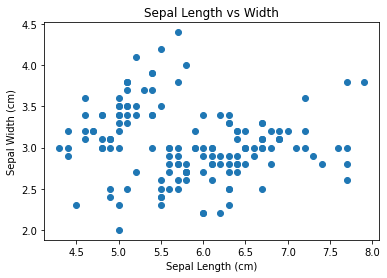

In [ ]:
ax=plt.axes()
ax.scatter(data.sepal_length,data.sepal_width)
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');

[Text(0, 0.5, 'Sepal Width (cm)'),
 Text(0.5, 0, 'Sepal Length (cm)'),
 Text(0.5, 1.0, 'Sepal Length vs Width')]

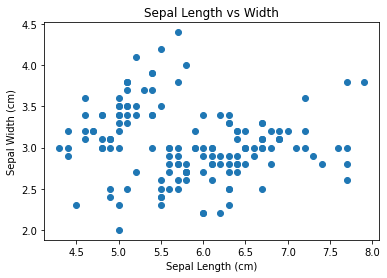

In [ ]:
ax=plt.axes()
ax.scatter(data.sepal_length,data.sepal_width)
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width')

histogram using matplotlib and pandas

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'sepal Length (cm)'),
 Text(0.5, 1.0, 'Distribution of Petal Lengths')]

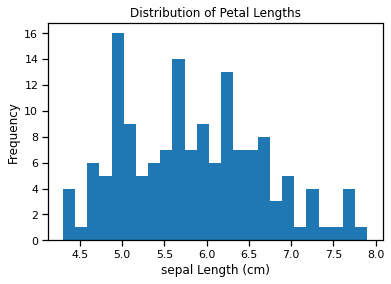

In [ ]:
ax=plt.axes()
ax.hist(data.sepal_length,bins=25)
ax.set(xlabel='sepal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths')

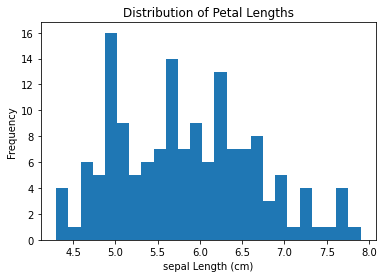

In [ ]:
# Alternatively using Pandas plotting functionality
ax = data.sepal_length.plot.hist(bins=25)

ax.set(xlabel='sepal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

Now create a single plot with histograms for each feature (petal_width, petal_length, sepal_width, sepal_length) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

Text(0.5, 0, 'size')

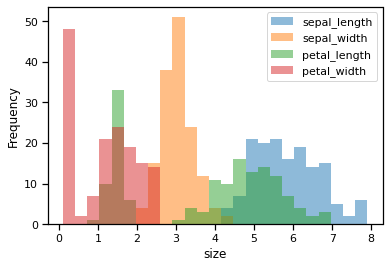

In [ ]:
import seaborn as sns
sns.set_context('notebook')
ax=data.plot.hist(bins=25,alpha=0.5)
ax.set_xlabel('size')


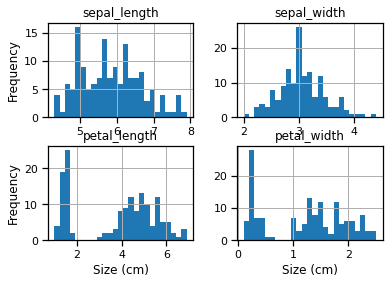

In [ ]:
axList = data.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')


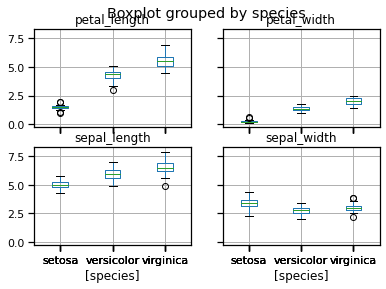

In [ ]:
data.boxplot(by='species');

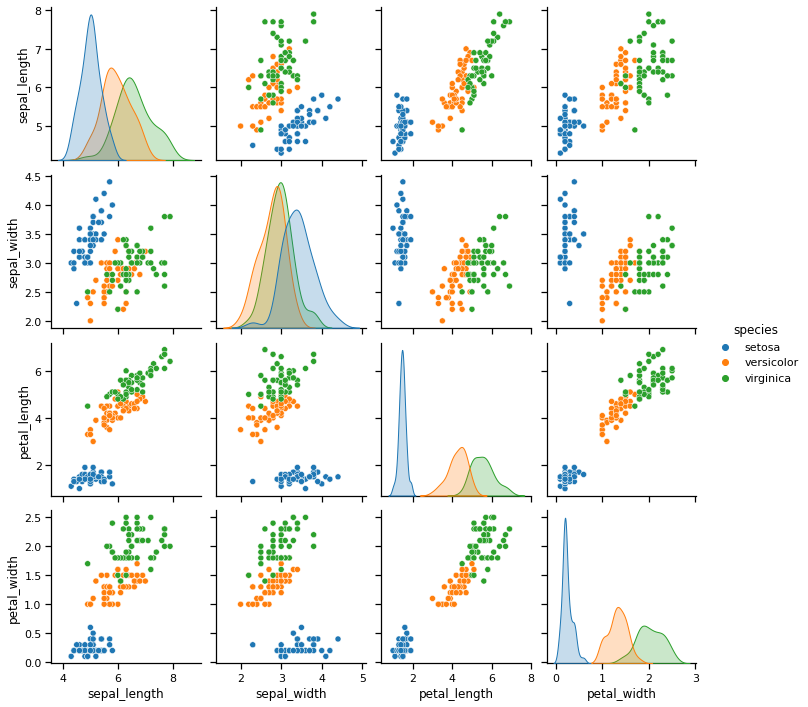

In [ ]:
sns.pairplot(data,hue='species')

In [ ]:
k= data.set_index('species')
k.head(10)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
setosa,5.4,3.9,1.7,0.4
setosa,4.6,3.4,1.4,0.3
setosa,5.0,3.4,1.5,0.2
setosa,4.4,2.9,1.4,0.2


In [ ]:
l=data.set_index('species').stack()
print(l)


species                
setosa     sepal_length    5.1
           sepal_width     3.5
           petal_length    1.4
           petal_width     0.2
           sepal_length    4.9
                          ... 
virginica  petal_width     2.3
           sepal_length    5.9
           sepal_width     3.0
           petal_length    5.1
           petal_width     1.8
Length: 600, dtype: float64


In [ ]:
m=data.set_index('species').stack().to_frame()
print(m)

                          0
species                    
setosa    sepal_length  5.1
          sepal_width   3.5
          petal_length  1.4
          petal_width   0.2
          sepal_length  4.9
...                     ...
virginica petal_width   2.3
          sepal_length  5.9
          sepal_width   3.0
          petal_length  5.1
          petal_width   1.8

[600 rows x 1 columns]


In [ ]:
m.reset_index()


,species,level_1,0
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,sepal_length,5.9
597,virginica,sepal_width,3.0
598,virginica,petal_length,5.1


In [ ]:
### BEGIN SOLUTION
# First we have to reshape the data so there is 
# only a single measurement in each column

plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


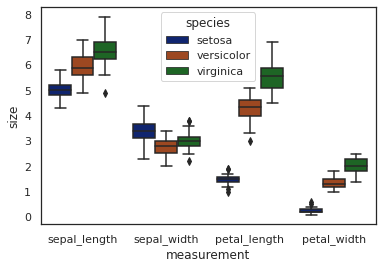

In [ ]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

# **Feature Engineering**

In [25]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [26]:
## Load in the Ames Housing Data
datafile = "Ames_Housing_Data.tsv"
df = pd.read_csv(datafile, sep='\t')

to know how many are non null

In [27]:
## Examine the columns, look at missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [28]:
# This is recommended by the data set author to remove a few outliers

df = df.loc[df['Gr Liv Area'] <= 4000,:]
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])
data = df.copy() # Keep a copy our original data 

Number of rows in the data: 2925
Number of columns in the data: 82


In [6]:
# A quick look at the data:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


one hot encoding

In [29]:
one_hot_encode_cols=df.dtypes[df.dtypes==object]

In [9]:
one_hot_encode_cols.head()

MS Zoning       object
Street          object
Alley           object
Lot Shape       object
Land Contour    object
dtype: object

In [30]:
one_hot_encode_cols=df.dtypes[df.dtypes==object]
one_hot_encode_cols = one_hot_encode_cols.index.tolist()
df[one_hot_encode_cols].head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal


In [31]:
df[one_hot_encode_cols].head().T

,0,1,2,3,4
MS Zoning,RL,RH,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,Reg,IR1,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
Lot Config,Corner,Inside,Corner,Corner,Inside
Land Slope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,NAmes,NAmes,NAmes,NAmes,Gilbert
Condition 1,Norm,Feedr,Norm,Norm,Norm


dummies

In [32]:
df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2925.0,1.464795e+03,8.464417e+02,1.0,732.0,1463.0,2199.0,2.930000e+03
PID,2925.0,7.143931e+08,1.887274e+08,526301100.0,528477030.0,535453210.0,907180130.0,1.007100e+09
MS SubClass,2925.0,5.739658e+01,4.266875e+01,20.0,20.0,50.0,70.0,1.900000e+02
Lot Frontage,2435.0,6.902382e+01,2.271092e+01,21.0,58.0,68.0,80.0,3.130000e+02
Lot Area,2925.0,1.010358e+04,7.781999e+03,1300.0,7438.0,9428.0,11515.0,2.152450e+05
...,...,...,...,...,...,...,...,...
Sale Condition_AdjLand,2925.0,4.102564e-03,6.393067e-02,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Alloca,2925.0,8.205128e-03,9.022520e-02,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Family,2925.0,1.572650e-02,1.244366e-01,0.0,0.0,0.0,0.0,1.000000e+00
Sale Condition_Normal,2925.0,8.246154e-01,3.803608e-01,0.0,1.0,1.0,1.0,1.000000e+00


In [33]:
print(df)

      Order        PID  ...  Sale Condition_Normal  Sale Condition_Partial
0         1  526301100  ...                      1                       0
1         2  526350040  ...                      1                       0
2         3  526351010  ...                      1                       0
3         4  526353030  ...                      1                       0
4         5  527105010  ...                      1                       0
...     ...        ...  ...                    ...                     ...
2925   2926  923275080  ...                      1                       0
2926   2927  923276100  ...                      1                       0
2927   2928  923400125  ...                      1                       0
2928   2929  924100070  ...                      1                       0
2929   2930  924151050  ...                      1                       0

[2925 rows x 262 columns]


log transforming skew variable

In [36]:
# Create a list of float colums to check for skewing
mask = data.dtypes == np.float
float_cols = data.columns[mask]
print(mask)

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[float_cols].skew()

Order             False
PID               False
MS SubClass       False
MS Zoning         False
Lot Frontage       True
                  ...  
Mo Sold           False
Yr Sold           False
Sale Type         False
Sale Condition    False
SalePrice         False
Length: 82, dtype: bool


In [35]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
BsmtFin SF 2,4.135900
Bsmt Half Bath,3.965970
Mas Vnr Area,2.565458
Lot Frontage,1.111071
Bsmt Unf SF,0.925021
BsmtFin SF 1,0.821985


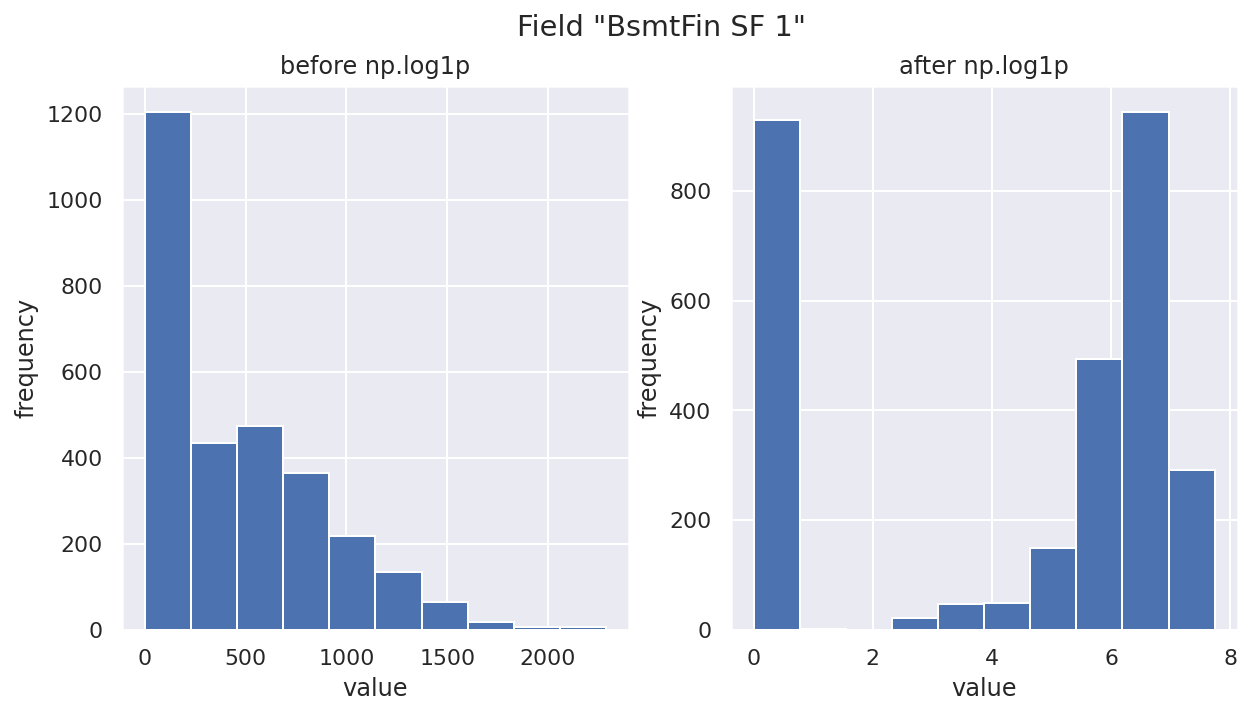

In [37]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "BsmtFin SF 1"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [38]:
# There are a *lot* of variables. Let's go back to our saved original data and look at how many values are missing for each variable. 
df = data
data.isnull().sum().sort_values()

Order                0
Sale Condition       0
Heating QC           0
Central Air          0
1st Flr SF           0
                  ... 
Fireplace Qu      1422
Fence             2354
Alley             2727
Misc Feature      2820
Pool QC           2914
Length: 82, dtype: int64

In [39]:
smaller_df= df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars','SalePrice']]

In [40]:
# Now we can look at summary statistics of the subset data
smaller_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Area,2925.0,10103.583590,7781.999124,1300.0,7438.0,9428.0,11515.0,215245.0
Overall Qual,2925.0,6.088205,1.402953,1.0,5.0,6.0,7.0,10.0
Overall Cond,2925.0,5.563761,1.112262,1.0,5.0,5.0,6.0,9.0
Year Built,2925.0,1971.302906,30.242474,1872.0,1954.0,1973.0,2001.0,2010.0
Year Remod/Add,2925.0,1984.234188,20.861774,1950.0,1965.0,1993.0,2004.0,2010.0
Gr Liv Area,2925.0,1493.978803,486.273646,334.0,1126.0,1441.0,1740.0,3820.0
Full Bath,2925.0,1.564786,0.551386,0.0,1.0,2.0,2.0,4.0
Bedroom AbvGr,2925.0,2.853675,0.827737,0.0,2.0,3.0,3.0,8.0
Fireplaces,2925.0,0.596923,0.645349,0.0,0.0,1.0,1.0,4.0
Garage Cars,2924.0,1.765048,0.759834,0.0,1.0,2.0,2.0,5.0


In [41]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2924 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


In [42]:
smaller_df = smaller_df.fillna(0)

In [43]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


## **Polynomial Features in scikit-learn**

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
#Instantiate and provide desired degree; 
#   Note: degree=2 also includes intercept, degree 1 terms, and cross-terms

pf = PolynomialFeatures(degree=2)

In [46]:
features = ['Lot Area', 'Overall Qual']
pf.fit(df[features])

PolynomialFeatures()

In [47]:
pf.get_feature_names()  #Must add input_features = features for appropriate names

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [48]:
feat_array = pf.transform(df[features])
pd.DataFrame(feat_array, columns = pf.get_feature_names(input_features=features))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,Lot Area,Overall Qual,Lot Area^2,Lot Area Overall Qual,Overall Qual^2
0,1.0,31770.0,6.0,1.009333e+09,190620.0,36.0
1,1.0,11622.0,5.0,1.350709e+08,58110.0,25.0
2,1.0,14267.0,6.0,2.035473e+08,85602.0,36.0
3,1.0,11160.0,7.0,1.245456e+08,78120.0,49.0
4,1.0,13830.0,5.0,1.912689e+08,69150.0,25.0
...,...,...,...,...,...,...
2920,1.0,7937.0,6.0,6.299597e+07,47622.0,36.0
2921,1.0,8885.0,5.0,7.894322e+07,44425.0,25.0
2922,1.0,10441.0,5.0,1.090145e+08,52205.0,25.0
2923,1.0,10010.0,5.0,1.002001e+08,50050.0,25.0


# **Hypothesis**

 **Objectives**

1. null and alternative hypothesis
2. hypothesis testing

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math

## Null Hypothesis

I claim that I can use mystical abilities to predict the outcome of coin flips.

You don't think I can.

How can we test it?

We do an experiment in which I call 100 coin flips. I get 57 right.

Am I special or not?

### **Determining the Null and Alternative Hypothesis**

**Null:** I'm not special; my true rate of flip prediction is 0.5. 

But even under this hypothesis, I could get 57 out of 100 right. So did I get lucky (by random chance) or am I mystical?

**Alternative:** My true rate of flip prediction is greater than 0.5.

The thing we're measuring from the experiment, or **test statistic**, is the number of correct flip predictions out of 100.

---

If the null hypothesis is correct, the test statistic is binomial distributed with parameters `n = 100` and `p = 0.5`. That is, if we repeated the whole experiment many times, we would see such a distribution for all the results.

So if the null hypothesis is correct, how likely is it that I got 57 or more coin flips correct?

Before we check (really, before we do the experiment) we decide what would convince us that I have ESP. The choice of a cutoff at 5% probability is common. That is, if we would only see data as extreme as we've seen less than 5% of the time, we'll say that seems too unlikely and we will conclude that we don't think the null hypothesis is true.

---

We have two outcomes, one with probability (p) and the other with probability (1-p) of happening (remember the axioms of probability?), so we know the [binomial](https://en.wikipedia.org/wiki/Binomial_distribution) [distribution](http://mathworld.wolfram.com/BinomialDistribution.html) is the [right tool for this analysis](https://homepage.divms.uiowa.edu/~mbognar/applets/bin.html).

In the case of the binomial distribution, which is discrete and not too complicated mathematically, we could just work out the probability. But in general we'll rely on some existing functionality. 

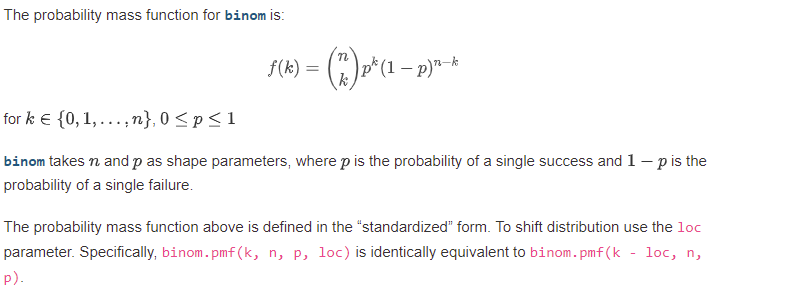

CDF is the cumulative distribution function, and that will be all values up until that first value, so we see 56.

Cumulative Distribution Function and tell us at given a certain number of coin flips, what is the area under the curve to give us the probability of that many coin flips or less.

 So given that we're working with a binomial distribution with N = 100 and P equals 0.5, those are the second and third values, the probability of getting 56 or lower. Now if we're working with a 50/50 flip, that's probably a very large value, the idea being that we take 1- that value to see the probability of getting 57 or greater.

In [50]:
from scipy.stats import binom
binom= binom.cdf(56, 100, 0.5)
print(binom*100)

90.33260477521789


In [51]:
from scipy.stats import binom
prob = 1 - binom.cdf(56, 100, 0.5)
print(prob*100)

print(str(round(prob*100, 1))+"%")

9.667395224782116
9.7%


The probability of getting 57 or more correct is about 9.7%. This is more than 5%, so we can't reject the null and conclude that I (probably) don't have mystical powers.

### Exercise

Find the number of coin flips a person would need to guess correctly for us to believe they're clairvoyant.

---

So we want to see at what point can we say that it's more extreme in terms of the higher ends of getting 95 percent or less. So if we have five percent left on that right end, that's saying that that value or greater only has a five percent chance, whereas that value or less will have a 95 percent chance of happening given that we have 0.5 fair flips coin. So we use 0.95, we pass in 100 because we have 100 coin flips with a fair coin given our null hypothesis, and then we add on so that we know it's that amount or greater. We see that we end up with 59. So the odds given that we have a fair coin of getting 59 or less is 95 percent, 59 or greater would only be five percent

ppf(q, n, p, loc=0)

Percent point function (inverse of cdf — percentiles).

In [52]:
from scipy.stats import binom
print(binom.ppf(0.95,100,0.5))

58.0


Which means, one should get 59 tosses or more to be considered clairvoyant. And we will say the person has predictive power with a confidence level of 95%.

---

## A More Specific Claim

So far so good. What if instead I said, "I'm not perfect, but I can predict coin tosses 60% of the time. Which is still good, which is still valuable."

What do we do in this case? Sure, we can do exactly what we did earlier and when I predict 57 times, we can reject my claim.

But what if I say, "Wait a minute. I said 60 and I got 57, that sounds pretty good to me."

Interpretation:
> "I happened to have a poor guessing day, and that's why my results aren't quite statistically significant!"

What do we say to that? The issue here is that there is no longer a single null hypothesis that we prove or disprove. Instead, **we have two competing hypotheses**:
    * Hypothesis A: There is no predictive power
    * Hypothesis B: There is a 60% predictive power

Each is a normal curve, with one centered at 50% and the other at 60%.

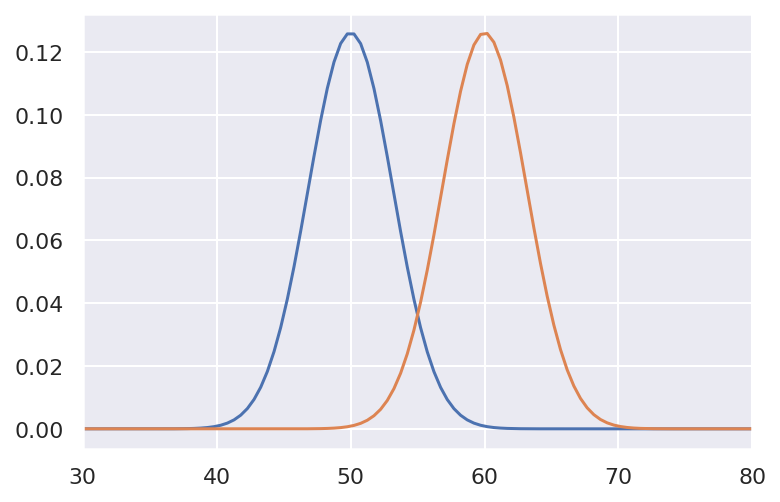

In [53]:
mu = 50
variance = 10
sigma = math.sqrt(variance) #standard deviation
x = np.linspace(1, 100, 200)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

mu = 60
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 200)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

plt.xlim(30,80)
plt.show()

Each one of our curves, when we're working with binomial distribution, will be a normal curve and will be centered at 50 versus 60. If you think about flipping a coin a 100 times, you are most likely to get around 50 correct if you're predicting if you have a 50 percent chance of getting it correct, whereas if you have a 60 percent chance of getting correct, you'll get around 60 correct. So we plot this out, mu being the average. So the first one it's going to be an average of 50. We set the variance equal to 10 and get the square root, which is just going to be our standard deviation. We are going to plot against the x-axis. So we're just going to do np.linspace 1-100, which gives us values between 1-100. How many values do we want between 1-100? We'll have an array of 200 values equally spaced between 1-100, so 1, 1.5, 2, 2.5, and so on. We're then going to plot that x versus a y-variable. That y is going to be stats.norm.pdf. Now, PDF is the probability distribution function. If you ever curious about what a function does, we're just going to run it, and we see that's the probability density function at x. So for each one of our values of x, we are going to output the probability of getting that value. Then for that, we're using the normal distribution with a mean of 50 and a standard deviation of the square root of 10. Then we do the same thing for 60. Then we plot this out. We set our x limit to just between 30 and 80. Now, looking at this curve, we have the values 50 at the middle of the blue curve and 60 at the middle of the orange curve, and we see that the odds of getting around 57 is around where these two intersect. So 57 correct guesses.

**What now? There just isn't enough data to achieve a confidence of 95%. There are few things we can do.**

### 1) Decrease confidence


Since we have a claim at 50 and 60, we can pick the mid-point, which is 55. We can say if I can predict over 55, then I have predictive power. This would mean that we have decreased our confidence level.

In [54]:
print (1 - binom.cdf(55, 100, 0.5))
print (binom.cdf(54, 100, 0.6))
print ((1 - binom.cdf(55, 100, 0.5))*100)
print ((binom.cdf(54, 100, 0.6))*100)

0.1356265120369171
0.13109045261974842
13.562651203691711
13.109045261974842


### 2) Be biased

But it is not neccessary that we bias the two hypotheses equally and pick the midpoint the way we did. The cut-off point can be anywhere. Currently, our error margins are even. The chance that someone has predictive power and we say no is 13% and the chance that someone has no power and we say they do is also 13%. As we change the cutoff, one error goes down and the other goes way up.

For example, if we stuck with the original 95% on a coin being fair:

In [55]:
binom.ppf(0.95, 100, 0.5) #this is the inverse of the cdf functions above

58.0

Then our cutff is 58. Our two errors will be:

In [56]:
print (1-binom.cdf(58, 100, 0.5))
print (binom.cdf(58, 100, 0.6))

0.04431304005703374
0.3774673238778277


5% chance someone has no power and we say they do. But a 38% chance someone has predictive power and we say no. Which depending on the problem might be exactly what we want. These two types of errors are called Type I and Type II. And we have the choice of biasing against one or the other.

### 3) Increase sample size

The best scenario though is to increase the sample size. Imagine what happens we did 1000 tosses instead of 100.

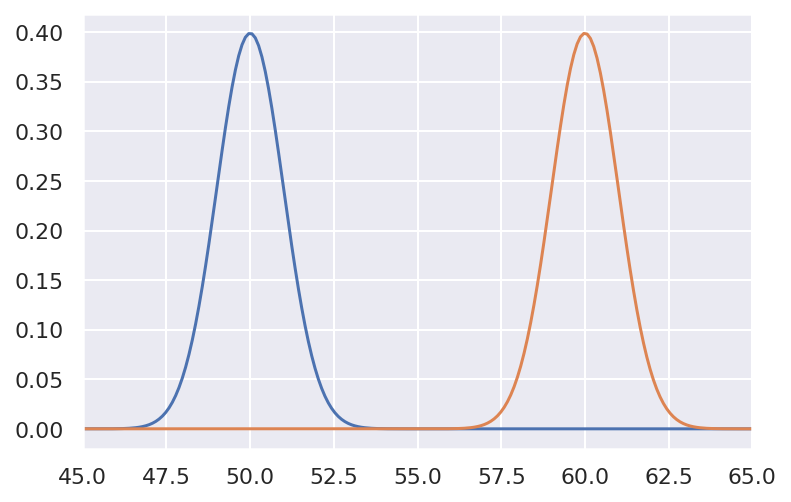

In [57]:
mu = 50
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 1000)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

mu = 60
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 1000)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

plt.xlim(45,65)
plt.show()

In [58]:
print (binom.ppf(0.95,1000,0.5))
print (binom.ppf(0.05,1000,0.6))

526.0
574.0


With a larger sample size, there will be much less of an overlap. So the chances of trying to trade-off between one and the other isn't as big of an issue. We can print for each of these what the cut-off would be given on one side, we have a fair coin the value higher than. What value do we need higher than in order to say that there is predictive power versus on the other end if we're using 60 percent, what value is lower then that we need to reject that hypothesis of 60 percent. So on one end there was 526. So you can predict 526 or greater I would say that you have predictive power whereas if you have 574 or less, I would reject the null that you have 60 percent predictive power.